count     33.000000
mean      46.432789
std       45.366468
min        0.000000
25%       12.969834
50%       40.633658
75%       62.012072
max      219.648903
Name: HRV, dtype: float64
count     60.000000
mean      47.802796
std       44.352666
min        0.000000
25%       17.607915
50%       31.815854
75%       67.157760
max      211.866841
Name: HRV, dtype: float64
count     74.000000
mean      35.622390
std       48.194872
min        1.765825
25%       11.935154
50%       18.980607
75%       45.240659
max      359.676142
Name: HRV, dtype: float64
count     62.000000
mean      64.551798
std       54.776227
min        0.000000
25%       22.747826
50%       45.974125
75%      101.039832
max      264.209773
Name: HRV, dtype: float64
count     73.000000
mean      61.671303
std       62.371827
min        0.000000
25%       20.257904
50%       43.156401
75%       91.791656
max      342.282920
Name: HRV, dtype: float64
count     78.000000
mean      48.179100
std       55.960572
min       

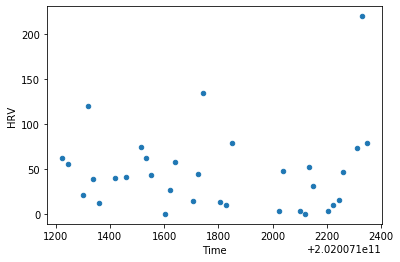

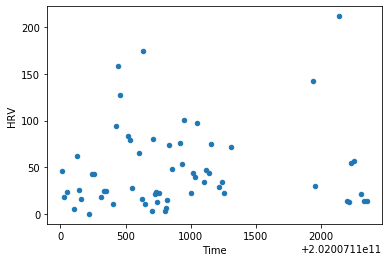

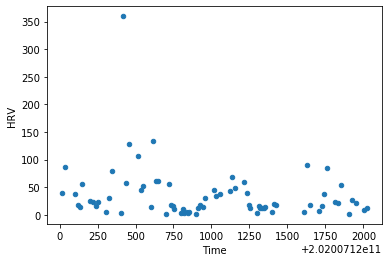

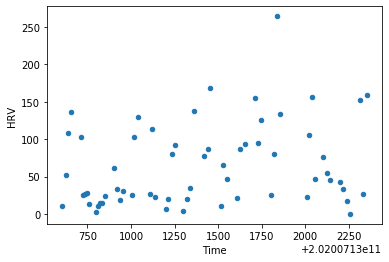

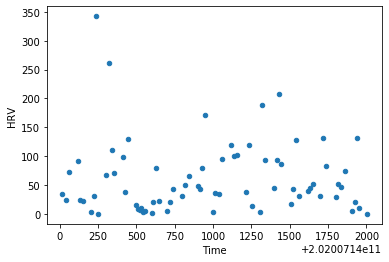

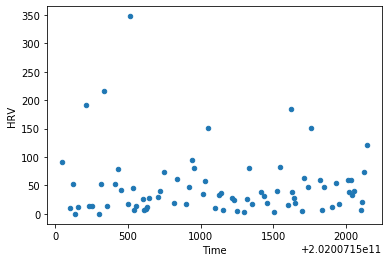

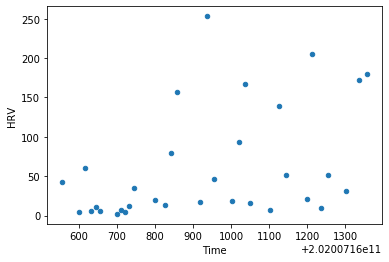

In [54]:
# Author Kyle Larson
# Filename: HRV_NN.ipynb
# License: GNU GENERAL PUBLIC LICENSE Version 3, 29 June 2007
# Description: The objective of this Python Notebook is to calculate HRV and predict it 

# Each file is then reopened and HRV plotted
import csv
import math
import pandas
HRV =0
Running_Sum_HR =0
HRV_sampling_iter =0
prev_HR =0
timeStamp =20200711.0
HR_sampling_interval =10
while(timeStamp < 20200718.0):
    with open(r"C:\Users\admin\anaconda3\01 PROJECTS\02 HEART RATE\By Day\Heart_Rate_"+str(timeStamp)+".csv", mode='r') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count =0
        #d = {'Time':[0], 'HR':[0]}
        #dv = {'Time':[0], 'HRV':[0]}
        df_HR = pandas.DataFrame()#d, columns=['Time','HR']
        df_HRV = pandas.DataFrame()#dv, columns=['Time','HRV']
        HRV_sampling_iter=0
        Running_Sum_HR=0
        for row in csv_reader:
            if(line_count >0):
                df_HR = df_HR.append({'Time':float(row[0]), 'HR':float(row[1])}, ignore_index=True)
            if(HRV_sampling_iter>1):
                Running_Sum_HR = Running_Sum_HR + pow( ( 1/(float(row[1]))-1/(prev_HR) ), 2)
                
                Time_interval = float(row[0]) - df_HR.iloc[line_count-HRV_sampling_iter]['Time']
                #note: large gaps in data, such as HR taken on different days, need to be removed
                #hours to minutes
                Time_interval_hours = (Time_interval-Time_interval%100)*60/100
                #parse the minutes
                Time_interval_minutes = Time_interval%100
                
                HRV =60000*pow((Running_Sum_HR)/HRV_sampling_iter, 0.5)
               
                if(Time_interval_hours + Time_interval_minutes > HR_sampling_interval):
                    #To account for sometimes irregular measurements a normalizing factor is used
                    norm_factor = HR_sampling_interval/(Time_interval_hours + Time_interval_minutes)
                    HRV = HRV*norm_factor
                    df_HRV = df_HRV.append({'Time':float(row[0]),'HRV':HRV}, ignore_index=True )
                    HRV_sampling_iter=0
                    Running_Sum_HR=0
            if(line_count>0): 
                prev_HR = float(row[1])
            HRV_sampling_iter +=1
            line_count +=1
            
    #df_HR.plot(kind='scatter', x='Time', y='HR')
    df_HRV.plot(kind='scatter', x='Time', y='HRV')
    print(df_HRV['HRV'].describe())
    timeStamp +=1